# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
import sqlalchemy as db
from sqlalchemy import *
import random
from bs4 import BeautifulSoup
import requests
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import csv
import re

warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option('display.max_colwidth', 300)
# set seed for reproducibility
np.random.seed(0)

In [2]:
response = requests.get("https://ycharts.com/companies/TSLA/revenues")

if response.status_code == 200:
    print("The web page responded with status code 200 (OK)")
else:
    print(f"The web page responded with status code {response.status_code}")

The web page responded with status code 403


In [3]:

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

for i in range(5):
    try:
        response = requests.get('https://ycharts.com/companies/TSLA/revenues', headers=headers)
        #response.raise_for_status()
        datos_htlm = response.text
        soup = BeautifulSoup(datos_htlm, 'html.parser')
        with open("tesla_rev.html", "wb") as dataset:
            dataset.write(response.content)
        break
    except requests.exceptions.HTTPError as e:
        if e.response.status_code == 403:
            print(f"Request failed with status code {e.response.status_code}. Retrying...")
            headers['User-Agent'] = headers['User-Agent'].replace('Chrome/58.0.3029.110', f'Chrome/{random.randint(50, 60)}.{random.randint(0, 100)}.{random.randint(0, 100)}')
        else:
            raise

In [4]:


# Encontrar todas las filas de las tablas usando 'tr' tag
rows = soup.find_all('tr')

# Creando una lista de listas que contienen la data de cada columna
data = []
for row in rows:
    cols = row.find_all('td')   # Encuentra las columnas que tienen etiquetas
    row_data = [col.text for col in cols]
    data.append(row_data)

# Vamos a enviar la lista a un archivo .csv para poder abrirlo con PANDAS aprovechando su versatilidad

with open('data_prov.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)



In [5]:
# Create a DataFrame from data_prov.csv

df_ = pd.read_csv('/workspaces/web-scraping-project-tutorial/src/data_prov.csv' ,names=['Fecha','Valores'],nrows=50 )
df_['Valores']=df_['Valores'].str.strip()
df_['Fecha_Analizada']=pd.to_datetime(df_['Fecha'],format="%B %d, %Y")

df_.head()


,Fecha,Valores,Fecha_Analizada
0,"March 31, 2024",21.30B,2024-03-31
1,"December 31, 2023",25.17B,2023-12-31
2,"September 30, 2023",23.35B,2023-09-30
3,"June 30, 2023",24.93B,2023-06-30
4,"March 31, 2023",23.33B,2023-03-31


In [6]:
# Elimino la M y la B de la columna Valores para tener un numérico

df_ = df_.dropna()
val=(df_['Valores'].dtype)
print(range(len(df_)))

if val =='object':
    for i in range(len(df_)):         
        if "M" in df_.loc[i,'Valores']:
            df_.loc[[i],'Valores_Num'] = df_.loc[[i],'Valores'].replace({'M':''}, regex=True)
            df_.loc[[i],'Valores_Num'] = df_.loc[[i],'Valores_Num'].astype(float)
            df_.loc[[i],'Valores_Num'] = df_.loc[[i],'Valores_Num'].apply(lambda x:x*1000000)
        elif "B" in df_.loc[i,'Valores']: 
            df_.loc[[i],'Valores_Num'] = df_.loc[[i],'Valores'].replace({'B':''}, regex=True)
            df_.loc[[i],'Valores_Num'] = df_.loc[[i],'Valores_Num'].astype(float)
            df_.loc[[i],'Valores_Num'] = df_.loc[[i],'Valores_Num'].apply(lambda x:x*1000000000)

df_
 

range(0, 50)


,Fecha,Valores,Fecha_Analizada,Valores_Num
0,"March 31, 2024",21.30B,2024-03-31,21300000000.0
1,"December 31, 2023",25.17B,2023-12-31,25170000000.0
2,"September 30, 2023",23.35B,2023-09-30,23350000000.0
3,"June 30, 2023",24.93B,2023-06-30,24930000000.0
4,"March 31, 2023",23.33B,2023-03-31,23330000000.0
5,"December 31, 2022",24.32B,2022-12-31,24320000000.0
6,"September 30, 2022",21.45B,2022-09-30,21450000000.0
7,"June 30, 2022",16.93B,2022-06-30,16930000000.0
8,"March 31, 2022",18.76B,2022-03-31,18760000000.0
9,"December 31, 2021",17.72B,2021-12-31,17720000000.0


In [7]:
df_Tesla = df_[df_["Valores_Num"] != ""]
df_Tesla.head()

,Fecha,Valores,Fecha_Analizada,Valores_Num
0,"March 31, 2024",21.30B,2024-03-31,21300000000.0
1,"December 31, 2023",25.17B,2023-12-31,25170000000.0
2,"September 30, 2023",23.35B,2023-09-30,23350000000.0
3,"June 30, 2023",24.93B,2023-06-30,24930000000.0
4,"March 31, 2023",23.33B,2023-03-31,23330000000.0


In [8]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

cursor = connection.cursor()
cursor.execute("""CREATE TABLE Tesla (Fecha, Valores, Fecha_Analizada, Valores_Num)""")



OperationalError: table Tesla already exists

In [ ]:
df_list = list(df_Tesla.to_records(index = False))
df_list [:5]

[('March 31, 2024', '21.30B', '2024-03-31T00:00:00.000000000', 21300000000.0),
 ('December 31, 2023', '25.17B', '2023-12-31T00:00:00.000000000', 25170000000.0),
 ('September 30, 2023', '23.35B', '2023-09-30T00:00:00.000000000', 23350000000.0),
 ('June 30, 2023', '24.93B', '2023-06-30T00:00:00.000000000', 24930000000.0),
 ('March 31, 2023', '23.33B', '2023-03-31T00:00:00.000000000', 23330000000.0)]

In [ ]:
cursor.executemany("INSERT INTO Tesla VALUES (?,?,?,?)", df_list)
connection.commit()

In [ ]:
# Check the data from the database
for row in cursor.execute("SELECT * FROM Tesla"):
    print(row)

('March 31, 2024', '21.30B', b'\x00\x00+\x17R\xb0\xc1\x17', 21300000000.0)
('December 31, 2023', '25.17B', b'\x00\x00\x16p\x82\xc1\xa5\x17', 25170000000.0)
('September 30, 2023', '23.35B', b'\x00\x00\xb27\x1e\x84\x89\x17', 23350000000.0)
('June 30, 2023', '24.93B', b'\x00\x00N\xff\xb9Fm\x17', 24930000000.0)
('March 31, 2023', '23.33B', b'\x00\x009X\xeaWQ\x17', 23330000000.0)
('December 31, 2022', '24.32B', b'\x00\x00sB\xaf\xb75\x17', 24320000000.0)
('September 30, 2022', '21.45B', b'\x00\x00\x0f\nKz\x19\x17', 21450000000.0)
('June 30, 2022', '16.93B', b'\x00\x00\xab\xd1\xe6<\xfd\x16', 16930000000.0)
('March 31, 2022', '18.76B', b'\x00\x00\x96*\x17N\xe1\x16', 18760000000.0)
('December 31, 2021', '17.72B', b'\x00\x00\xd0\x14\xdc\xad\xc5\x16', 17720000000.0)
('September 30, 2021', '13.76B', b'\x00\x00l\xdcwp\xa9\x16', 13760000000.0)
('June 30, 2021', '11.96B', b'\x00\x00\x08\xa4\x133\x8d\x16', 11960000000.0)
('March 31, 2021', '10.39B', b'\x00\x00\xf3\xfcCDq\x16', 10390000000.0)
('Decembe

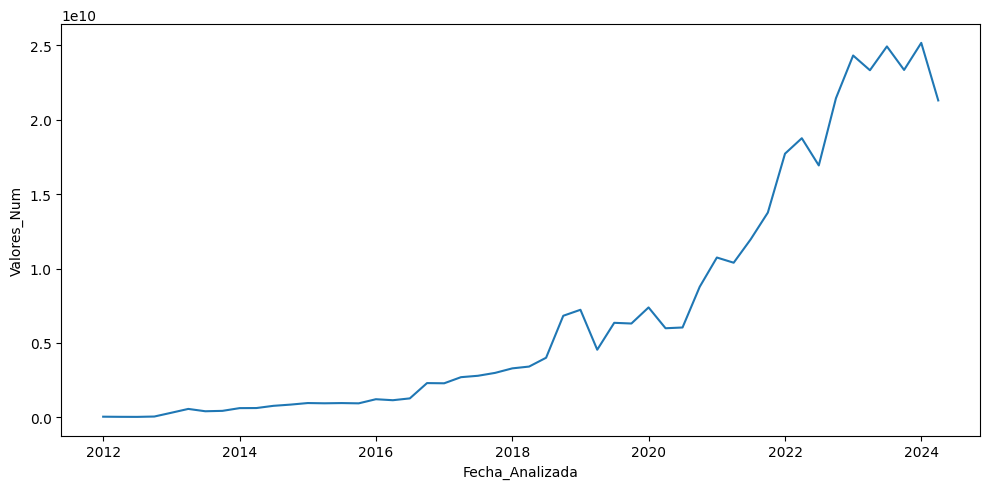

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

df_Tesla["Fecha_Analizada"] = pd.to_datetime(df_Tesla["Fecha_Analizada"])
df_Tesla["Valores_Num"] = df_Tesla["Valores_Num"].astype('int')
sns.lineplot(data = df_Tesla, x = "Fecha_Analizada", y = "Valores_Num")

plt.tight_layout()

plt.show()

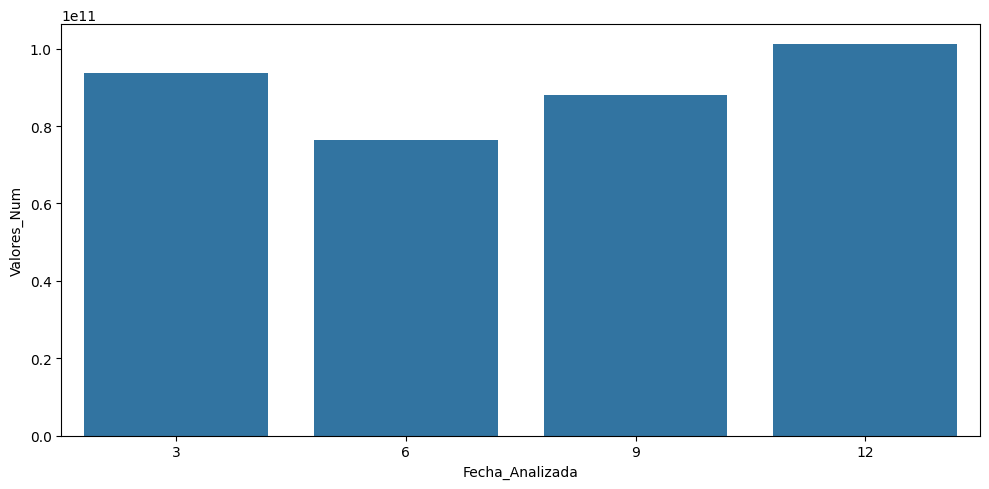

In [10]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue_monthly = df_Tesla.groupby(df_Tesla["Fecha_Analizada"].dt.month).sum().reset_index()

sns.barplot(data = tesla_revenue_monthly, x = "Fecha_Analizada", y = "Valores_Num")

plt.tight_layout()

plt.show()

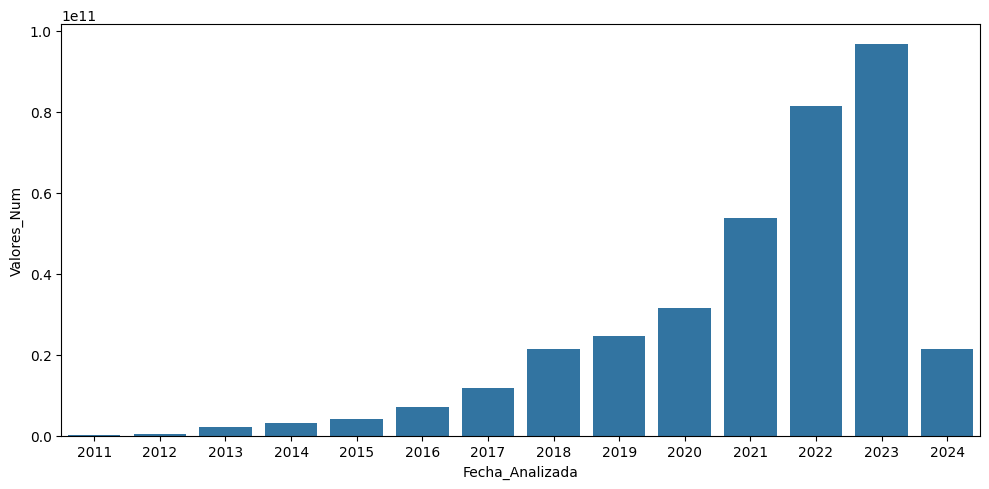

In [11]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue_monthly = df_Tesla.groupby(df_Tesla["Fecha_Analizada"].dt.year).sum().reset_index()

sns.barplot(data = tesla_revenue_monthly, x = "Fecha_Analizada", y = "Valores_Num")

plt.tight_layout()

plt.show()